In [1]:
# Import necessary libraries 
import yfinance as yf

In [2]:
sp500 = yf.Ticker("^GSPC")

In [3]:
sp500 = sp500.history(period="max")

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-27 00:00:00-05:00,5074.600098,5080.689941,5057.290039,5078.180176,3925950000,0.0,0.0
2024-02-28 00:00:00-05:00,5067.200195,5077.370117,5058.350098,5069.759766,3789370000,0.0,0.0
2024-02-29 00:00:00-05:00,5085.359863,5104.990234,5061.890137,5096.270020,5219740000,0.0,0.0


In [5]:
# sp500.index / reformat to just date from datetime
sp500.index = pd.to_datetime(sp500.index)
sp500.index = sp500.index.strftime('%Y-%m-%d')
sp500.index

Index(['1927-12-30', '1928-01-03', '1928-01-04', '1928-01-05', '1928-01-06',
       '1928-01-09', '1928-01-10', '1928-01-11', '1928-01-12', '1928-01-13',
       ...
       '2024-02-20', '2024-02-21', '2024-02-22', '2024-02-23', '2024-02-26',
       '2024-02-27', '2024-02-28', '2024-02-29', '2024-03-01', '2024-03-04'],
      dtype='object', name='Date', length=24158)

<Axes: xlabel='Date'>

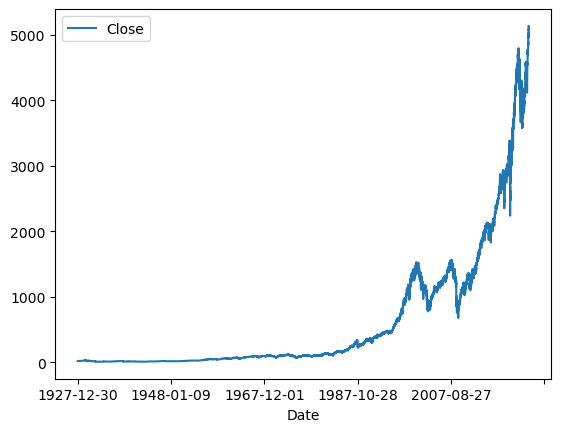

In [6]:
sp500.plot.line(y="Close", use_index=True)

In [7]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [8]:
# Will stock go up?
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [9]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-02-27,5074.600098,5080.689941,5057.290039,5078.180176,3925950000,5069.759766
2024-02-28,5067.200195,5077.370117,5058.350098,5069.759766,3789370000,5096.270020
2024-02-29,5085.359863,5104.990234,5061.890137,5096.270020,5219740000,5137.080078


In [10]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-02-27,5074.600098,5080.689941,5057.290039,5078.180176,3925950000,5069.759766,0
2024-02-28,5067.200195,5077.370117,5058.350098,5069.759766,3789370000,5096.270020,1
2024-02-29,5085.359863,5104.990234,5061.890137,5096.270020,5219740000,5137.080078,1


In [12]:
# Remove all data that came before 1990
sp500 = sp500.loc["1990-01-01":].copy()

In [13]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-02-27,5074.600098,5080.689941,5057.290039,5078.180176,3925950000,5069.759766,0
2024-02-28,5067.200195,5077.370117,5058.350098,5069.759766,3789370000,5096.270020,1
2024-02-29,5085.359863,5104.990234,5061.890137,5096.270020,5219740000,5137.080078,1


In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# Split data into train and test set | Not using cross validation (prevents leakage)
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

# Fit the model. Train the model using the predictor columns and try to predict the target.
predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [15]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [16]:
# Turn numpy array(og preds) into a pandas series(new preds)
preds = pd.Series(preds, index=test.index)

In [17]:
# Calc precision score

precision_score(test["Target"], preds)

0.5

In [18]:
# Concat and display both target and preds as two columns, axis=1 treats each input as a column in our dataset
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

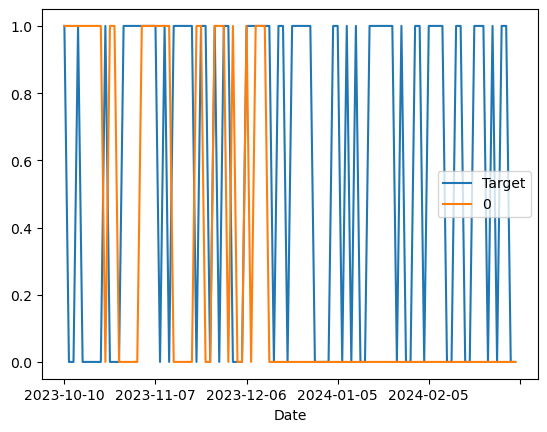

In [19]:
combined.plot()

In [20]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [21]:
# Testing 10 years worth of data while stepping through it 1 year at a time to test
# Every year has about 250 trading days
def backtest(data, model, predictors, start=2500, step=250): 
#   list of data frames, where each df is the predictions for a single year
    all_predictions = [] 
    for i in range(start, data.shape[0], step):
#   all years prior to the current year
        train = data.iloc[0:i].copy()
#   current year
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [22]:
predictions = backtest(sp500, model, predictors)

In [23]:
predictions["Predictions"].value_counts()
# Predicted market would go down (0) and go up (1)

Predictions
0    3512
1    2596
Name: count, dtype: int64

In [24]:
precision_score(predictions['Target'], predictions["Predictions"])
# Precision score ~52%, needs improvement.

0.5288906009244992

In [25]:
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [27]:
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-26,5093.000000,5097.660156,5068.910156,5069.529785,3683930000,5078.180176,1,0.998103,1.0,1.005753,3.0,1.053559,37.0,1.147924,140.0,1.256950,532.0
2024-02-27,5074.600098,5080.689941,5057.290039,5078.180176,3925950000,5069.759766,0,1.000852,1.0,1.003381,4.0,1.053432,38.0,1.148730,141.0,1.258437,533.0
2024-02-28,5067.200195,5077.370117,5058.350098,5069.759766,3789370000,5096.270020,1,0.999170,1.0,0.998248,3.0,1.049863,37.0,1.145666,141.0,1.255628,533.0


In [28]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [29]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [30]:
predictions = backtest(sp500, model, new_predictors)

In [31]:
predictions["Predictions"].value_counts()

Predictions
0.0    4275
1.0     832
Name: count, dtype: int64

In [32]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5733173076923077